# MODULE 8: NEURAL NETWORKS & DEEP LEARNING

## Task 2: Image Classification using CNN.

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# !kaggle datasets download -d salader/dogs-vs-cats

In [7]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dogs-vs-cats.zip or
        /content/dogs-vs-cats.zip.zip, and cannot find /content/dogs-vs-cats.zip.ZIP, period.


In [8]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import imghdr
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix

In [9]:

import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,auc


In [10]:
image_filenames = os.listdir('/content/dogs_vs_cats/train/dogs')
image_filenames

['dog.5451.jpg',
 'dog.10638.jpg',
 'dog.4802.jpg',
 'dog.11137.jpg',
 'dog.3801.jpg',
 'dog.11468.jpg',
 'dog.700.jpg',
 'dog.10359.jpg',
 'dog.10749.jpg',
 'dog.11214.jpg',
 'dog.4910.jpg',
 'dog.4431.jpg',
 'dog.11457.jpg',
 'dog.1447.jpg',
 'dog.6618.jpg',
 'dog.4954.jpg',
 'dog.5425.jpg',
 'dog.7894.jpg',
 'dog.6182.jpg',
 'dog.3550.jpg',
 'dog.707.jpg',
 'dog.2718.jpg',
 'dog.590.jpg',
 'dog.5226.jpg',
 'dog.1757.jpg',
 'dog.6951.jpg',
 'dog.1606.jpg',
 'dog.4433.jpg',
 'dog.7057.jpg',
 'dog.2432.jpg',
 'dog.7774.jpg',
 'dog.8295.jpg',
 'dog.1346.jpg',
 'dog.12420.jpg',
 'dog.4292.jpg',
 'dog.11317.jpg',
 'dog.10046.jpg',
 'dog.10770.jpg',
 'dog.11026.jpg',
 'dog.5187.jpg',
 'dog.2069.jpg',
 'dog.1217.jpg',
 'dog.2720.jpg',
 'dog.6481.jpg',
 'dog.4696.jpg',
 'dog.8780.jpg',
 'dog.10358.jpg',
 'dog.4152.jpg',
 'dog.11147.jpg',
 'dog.10682.jpg',
 'dog.8223.jpg',
 'dog.9513.jpg',
 'dog.7413.jpg',
 'dog.12159.jpg',
 'dog.5928.jpg',
 'dog.12376.jpg',
 'dog.12449.jpg',
 'dog.10379.jpg'

In [11]:
def plot_images(directory_path,class_animal,num_images=9):
  image_filenames = os.listdir(directory_path)
  if len(image_filenames) < num_images:
    print("Only Found ",len(image_filenames)," images in ",directory_path," directory")
    num_images = len(image_filenames)

  selected_images = random.sample(image_filenames,num_images)
  fig,axes = plt.subplots(3,3,figsize=(8,8))
  axes = axes.ravel()

  for i,image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path,image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(class_animal)
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

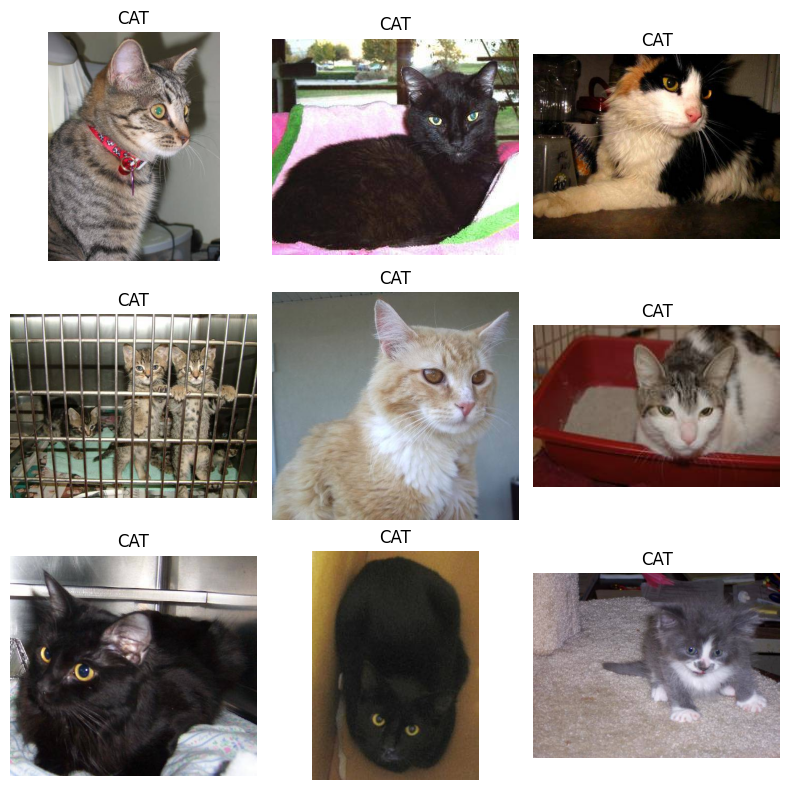

In [12]:
cat_directory_path = '/content/dogs_vs_cats/train/cats'
plot_images(cat_directory_path,'CAT',9)

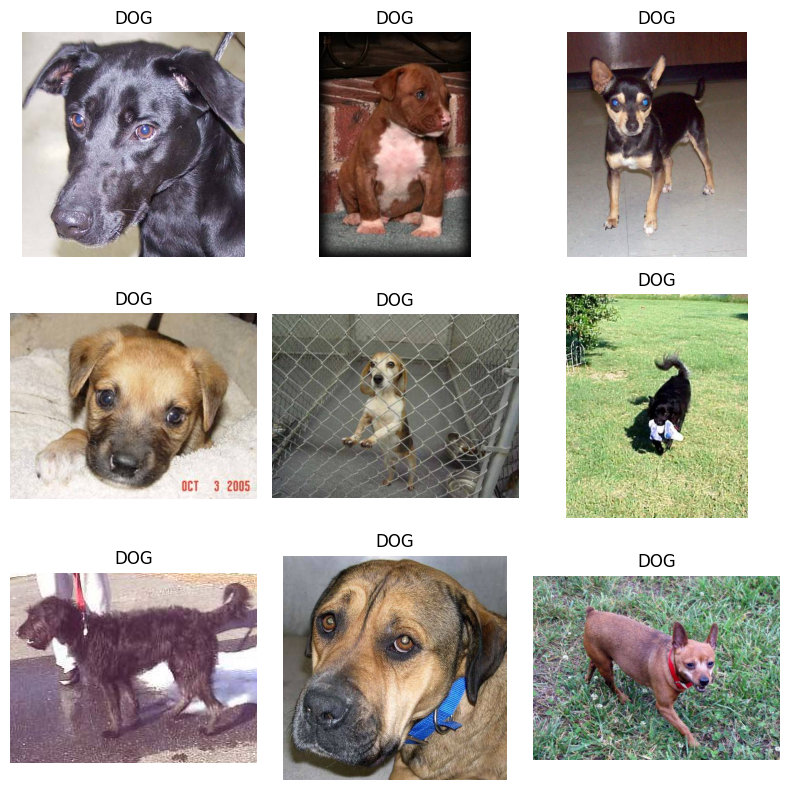

In [13]:
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images(dog_directory_path,'DOG',9)

In [14]:
cat_images = os.listdir(cat_directory_path)
dog_images  = os.listdir(dog_directory_path)

class_animal = ['CAT','DOG']
count = (len(cat_images),len(dog_images))

In [15]:
count

(10000, 10000)

In [16]:
img_ext =  ['jpg','jpeg','png']
data_dir = '/content/dogs_vs_cats'

for root,dir,files in os.walk(data_dir):
  for file in files:
    file_path = os.path.join(root,file)
    try:
      file_type =  imghdr.what(file_path)
      if file_type not in img_ext:
        print("Image Not in Extension List :",file_path)
        os.remove(file_path)
      else:
        img = cv2.imread(file_path)
    except Exception as e:
      print("Issue with Image :",file_path,"\nError :",e)
      os.remove(file_path)


In [17]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      img_array = np.array(img)
      return img_array
  except Exception as e:
    print("Error processing image :",image_path,"\nError :",e)
    return None

array([[[140, 112,  75],
        [140, 112,  75],
        [144, 116,  79],
        ...,
        [127,  77,  54],
        [120,  77,  58],
        [ 88,  49,  32]],

       [[136, 108,  71],
        [137, 109,  72],
        [143, 115,  78],
        ...,
        [129,  79,  56],
        [130,  87,  68],
        [ 78,  39,  22]],

       [[114,  88,  53],
        [116,  90,  55],
        [124,  98,  63],
        ...,
        [117,  67,  44],
        [134,  89,  70],
        [ 62,  21,   3]],

       ...,

       [[ 85,  78,  68],
        [ 72,  65,  55],
        [ 62,  54,  43],
        ...,
        [ 91,  80,  52],
        [ 90,  78,  54],
        [ 91,  79,  55]],

       [[ 73,  66,  56],
        [ 63,  56,  46],
        [ 58,  50,  39],
        ...,
        [109,  98,  70],
        [102,  90,  66],
        [ 97,  85,  61]],

       [[ 66,  59,  49],
        [ 59,  52,  42],
        [ 57,  49,  38],
        ...,
        [109,  98,  70],
        [ 95,  83,  59],
        [ 90,  78,  54]]], dtype=uint8)
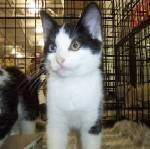

In [18]:
image_to_array("/content/dogs_vs_cats/train/cats/cat.1000.jpg")

In [19]:
image= '/content/train/cats/cat.1.jpg'
img = cv2.imread(image)
if img is not None:
  print(img)
  print(img.shape)
else:
  print("Image cannot be loaded")

[[[ 40  44  39]
  [ 40  44  39]
  [ 43  44  40]
  ...
  [173 204 207]
  [166 199 202]
  [163 198 201]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [169 200 203]
  [163 196 199]
  [159 194 197]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [166 195 199]
  [164 194 199]
  [162 194 199]]

 ...

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 17  23  36]
  [ 24  30  41]
  [ 40  46  57]]

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 21  29  42]
  [ 25  34  44]
  [ 36  45  55]]

 [[ 31  30  32]
  [ 28  27  29]
  [ 24  23  25]
  ...
  [ 30  38  51]
  [ 23  32  42]
  [ 21  30  40]]]
(280, 300, 3)


In [20]:
base_dir = '/content/train'
train_datagen= ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [21]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [22]:
train_classes_labels  = train_generator.class_indices
print("Training class label :",train_classes_labels)

validation_class_lables = validation_generator.class_indices
print("validation class label :",validation_class_lables)

Training class label : {'cats': 0, 'dogs': 1}
validation class label : {'cats': 0, 'dogs': 1}


In [23]:
images, labels = next(train_generator)
images, labels

(array([[[[0.74509805, 0.68235296, 0.6313726 ],
          [0.7411765 , 0.6784314 , 0.627451  ],
          [0.73333335, 0.67058825, 0.61960787],
          ...,
          [0.14117648, 0.15294118, 0.07058824],
          [0.38823533, 0.4039216 , 0.30588236],
          [0.14901961, 0.16862746, 0.0509804 ]],
 
         [[0.7372549 , 0.6745098 , 0.62352943],
          [0.7372549 , 0.6745098 , 0.62352943],
          [0.7411765 , 0.6784314 , 0.627451  ],
          ...,
          [0.10588236, 0.1137255 , 0.01960784],
          [0.18039216, 0.18823531, 0.09411766],
          [0.20000002, 0.21176472, 0.09803922]],
 
         [[0.73333335, 0.67058825, 0.61960787],
          [0.7372549 , 0.6745098 , 0.62352943],
          [0.74509805, 0.68235296, 0.6313726 ],
          ...,
          [0.11764707, 0.11764707, 0.01568628],
          [0.1254902 , 0.13725491, 0.03137255],
          [0.1764706 , 0.1764706 , 0.06666667]],
 
         ...,
 
         [[0.6784314 , 0.7686275 , 0.9725491 ],
          [0.67450

In [24]:
def plot_images_from_generator(generator, num_images = 4):
  images, labels = next(train_generator)

  fig,axes = plt.subplots(1,num_images,figsize=(20,20))
  axes = axes.flatten()

  for img,label,ax in zip(images,labels,axes):
    ax.imshow(img)
    class_label = dict((v,k) for k,v in generator.class_indices.items())
    ax.set_title(class_label[int(label)])
    ax.axis('off')

  plt.tight_layout()

  plt.show()

In [25]:
class_label = dict((v,k) for k,v in train_generator.class_indices.items())
class_label

{0: 'cats', 1: 'dogs'}

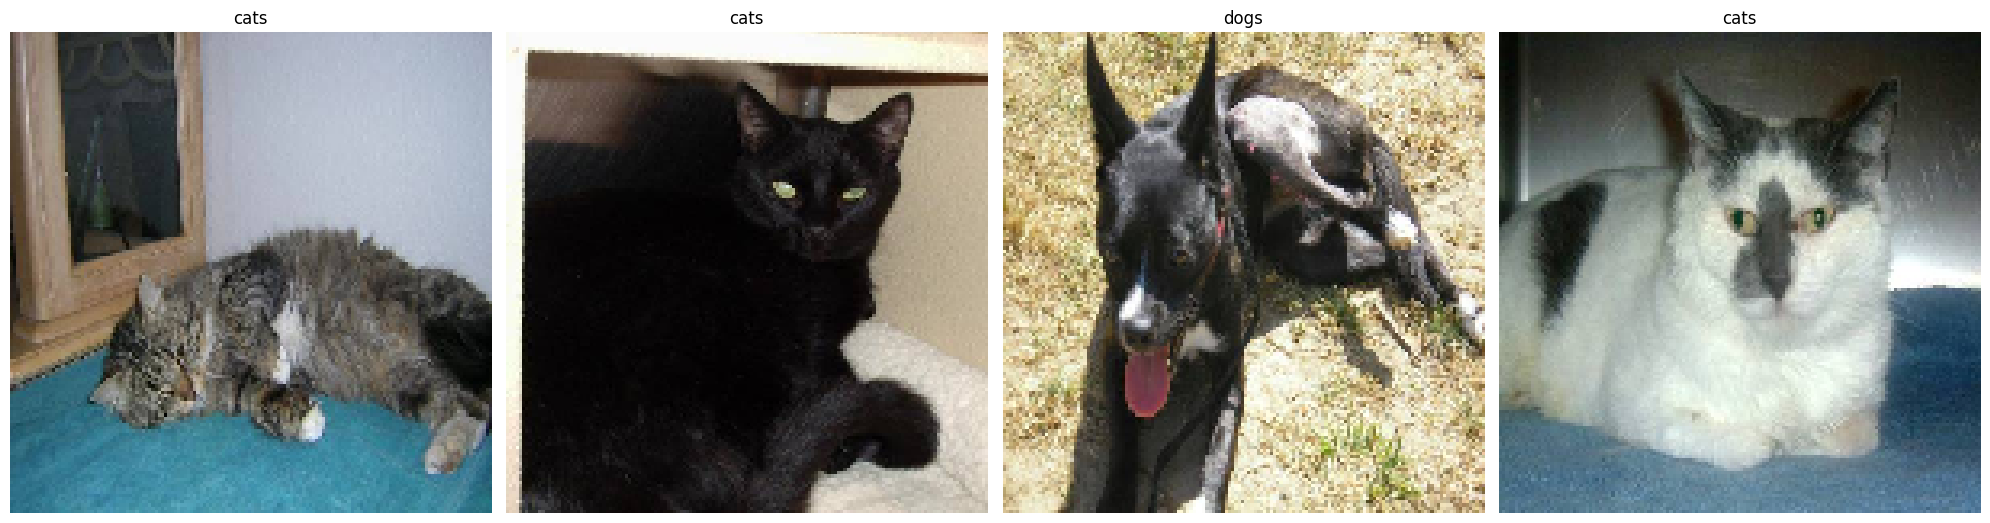

In [26]:
plot_images_from_generator(train_generator,4)

In [27]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [30]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps = np.ceil(validation_generator.samples / batch)

In [31]:
train_steps

np.float64(800.0)

In [32]:
validation_steps

np.float64(200.0)

In [39]:
history = model.fit(train_generator,
              steps_per_epoch=int(train_steps),
              epochs=5,batch_size=batch,
              validation_data=validation_generator,
              validation_steps=int(validation_steps))

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6971 - loss: 0.5813

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 930s 1s/step - accuracy: 0.6971 - loss: 0.5813 - val_accuracy: 0.7510 - val_loss: 0.5081
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 966s 1s/step - accuracy: 0.7725 - loss: 0.4740 - val_accuracy: 0.8085 - val_loss: 0.4254
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 934s 1s/step - accuracy: 0.8161 - loss: 0.4025 - val_accuracy: 0.8270 - val_loss: 0.3867
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 965s 1s/step - accuracy: 0.8602 - loss: 0.3191 - val_accuracy: 0.8090 - val_loss: 0.4263
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 949s 1s/step - accuracy: 0.8942 - loss: 0.2507 - val_accuracy: 0.8528 - val_loss: 0.3418


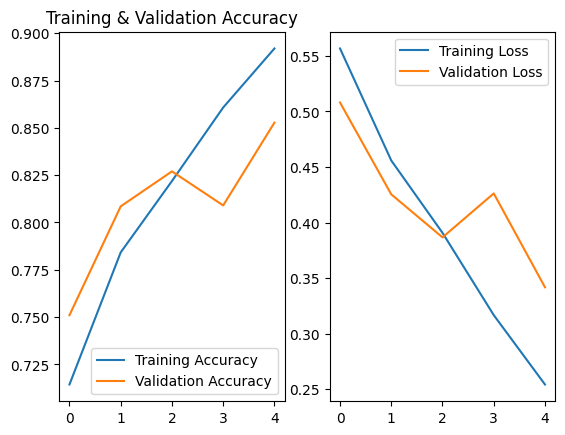

In [40]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label='Training Accuracy')
plt.plot(epoch_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')

In [41]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_dir = '/content/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

Found 5000 images belonging to 2 classes.


In [42]:
test_step = int(np.ceil(test_generator.samples / batch))

In [43]:
prob = model.predict(test_generator,steps=test_step)

250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step


In [44]:
test_generator.reset()
true_classes = test_generator.classes
prob = model.predict(test_generator,steps=test_step)
pred_classes = (prob>0.5).astype(int).squeeze()

250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 345ms/step


In [45]:
pred_classes

array([0, 0, 0, ..., 1, 0, 1])

In [46]:
conf_mat = confusion_matrix(true_classes,pred_classes)
print("Confusion Matrix :\n",conf_mat)

Confusion Matrix :
 [[2169  331]
 [ 336 2164]]


In [86]:
canimals = []
for i in pred_classes:
  if i == 0:
    canimals.append('CAT')
  else:
    canimals.append('DOG')
print(canimals)

['CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'DOG', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT', 'CAT'